# (Gobike)
## by (Abdelrahman Aman)

## Preliminary Wrangling

> This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area..

## What is this analysis for ? 
### 
The marketing team in our company is in need of information about behavior and characteristics of the current users of our Bikes riders in order to target similar potential customers and to engage customer Retention program, I will try to help them by this analysis and provide them with a proper presentation in our upcoming meeting. 

### The Questions that we are going to answer by this analysis are as the following: 
>
#### What is the most gender riding our bikes? 
>This will help to target the right gender by  focusing on the most gender in 
the advertising campaign
#### What is the most time riders are using our bikes? (Weekdays)
>This will help it set the time to lunch the advertising campaign, which most probably will be prior to peak time 
>
#### What is most age using our bikes?
#### Should we focus on subscriber or regular users in our customer retention program?
>
### Still, there are more questions but we will answer the above questions only in this presentation 
>
#### What are the most months that have the biggest proportion of operations?
#### What are the most common stations that are busy with riders?
>This will give insight to the marketing team to where to put more flyers, of course, a piece of more information is required for this question such as the density of areas surrounded the station and the nature of people living in the area surrounded to that stations but this is out of scope for now as this data is in not in our possession.   




In [179]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

### Gathering 

In [180]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')


### Exploring 

In [181]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [182]:
df.sample(10)

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
994,384,2019-02-28 19:56:45.8370,2019-02-28 20:03:10.4730,250.0,North Berkeley BART Station,37.873558,-122.283093,257.0,Fifth St at Delaware St,37.870407,-122.299676,1671,Subscriber,1954.0,Male,No
138129,237,2019-02-08 08:03:09.2030,2019-02-08 08:07:06.3720,211.0,Broadway at 40th St,37.827757,-122.256716,176.0,MacArthur BART Station,37.828410,-122.266315,4917,Customer,1986.0,Female,No
97803,739,2019-02-15 08:30:55.1290,2019-02-15 08:43:14.8200,144.0,Precita Park,37.747300,-122.411403,58.0,Market St at 10th St,37.776619,-122.417385,2545,Subscriber,1989.0,Male,No
174258,555,2019-02-02 19:53:20.0130,2019-02-02 20:02:35.6420,245.0,Downtown Berkeley BART,37.870139,-122.268422,253.0,Haste St at College Ave,37.866418,-122.253799,4552,Subscriber,1996.0,Male,No
99634,1413,2019-02-14 19:13:05.7050,2019-02-14 19:36:38.8270,279.0,Santa Clara St at 7th St,37.339146,-121.884105,279.0,Santa Clara St at 7th St,37.339146,-121.884105,2496,Subscriber,1992.0,Male,Yes
122318,354,2019-02-11 12:17:02.7900,2019-02-11 12:22:57.1320,253.0,Haste St at College Ave,37.866418,-122.253799,240.0,Haste St at Telegraph Ave,37.866043,-122.258804,2776,Subscriber,1998.0,Male,Yes
180880,755,2019-02-01 09:47:49.9590,2019-02-01 10:00:25.4530,180.0,Telegraph Ave at 23rd St,37.812678,-122.268773,202.0,Washington St at 8th St,37.800754,-122.274894,2349,Subscriber,1950.0,Male,No
50972,865,2019-02-21 18:23:07.3620,2019-02-21 18:37:33.2410,338.0,13th St at Franklin St,37.803189,-122.270579,197.0,El Embarcadero at Grand Ave,37.808848,-122.249680,1247,Subscriber,1992.0,Male,No
95172,220,2019-02-15 14:50:37.2770,2019-02-15 14:54:17.4290,24.0,Spear St at Folsom St,37.789677,-122.390428,16.0,Steuart St at Market St,37.794130,-122.394430,4634,Subscriber,1980.0,Male,No
90287,2778,2019-02-16 12:30:48.0930,2019-02-16 13:17:06.5790,78.0,Folsom St at 9th St,37.773717,-122.411647,133.0,Valencia St at 22nd St,37.755213,-122.420975,4639,Customer,NaN,NaN,No


In [183]:
df.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [184]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [185]:
df.shape

(183412, 16)

In [186]:
df.duplicated().sum()

0

In [187]:
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [188]:
df.dtypes

duration_sec                 int64
start_time                  object
end_time                    object
start_station_id           float64
start_station_name          object
start_station_latitude     float64
start_station_longitude    float64
end_station_id             float64
end_station_name            object
end_station_latitude       float64
end_station_longitude      float64
bike_id                      int64
user_type                   object
member_birth_year          float64
member_gender               object
bike_share_for_all_trip     object
dtype: object

### Assessing\Cleaning\Test

In [189]:
# Check Value counts for member_gender              
df['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [190]:
# Check missing value for member_gender
df['member_gender'].isnull().sum()

8265

In [191]:
# Create a new cleaned df
dfc = df.copy()
# Remove Null values
dfc = dfc.dropna()

In [192]:
# Test missing value 
dfc['member_gender'].isnull().sum()

0

In [193]:
# Remove 'other' gender 
dfc = dfc.drop(dfc[dfc.member_gender == 'Other'].index)

In [194]:
# Test value counts
dfc['member_gender'].value_counts()

Male      130500
Female     40805
Name: member_gender, dtype: int64

In [195]:
# Check user_type value counts 
dfc['user_type'].value_counts()


Subscriber    155189
Customer       16116
Name: user_type, dtype: int64

In [196]:
# Remove 1982.5970170164326 value 
dfc = dfc.drop(dfc[dfc.user_type == 1982.5970170164326].index)
dfc['user_type'].value_counts()


Subscriber    155189
Customer       16116
Name: user_type, dtype: int64

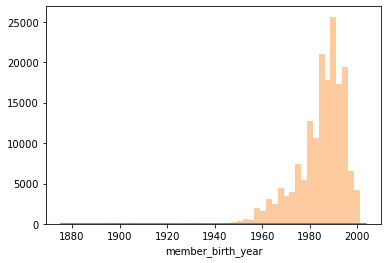

In [197]:
# Check member age outlier
sb.distplot(dfc['member_birth_year'])
sb.distplot(dfc['member_birth_year'], kde=False);


In [198]:
# Replace outlier with pervious value
dfc.loc[(dfc.member_birth_year <= 1940),'member_birth_year']=0
dfc['member_birth_year']= dfc['member_birth_year'].mask(dfc['member_birth_year'] <= 1).ffill(downcast='infer')
dfc.member_birth_year.describe()

count    171305.000000
mean       1984.914930
std           9.866659
min        1941.000000
25%        1980.000000
50%        1987.000000
75%        1992.000000
max        2001.000000
Name: member_birth_year, dtype: float64

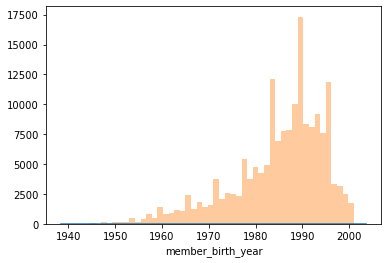

In [199]:
# Test
sb.distplot(dfc['member_birth_year'])
sb.distplot(dfc['member_birth_year'], kde=False);

In [200]:
# member_birth_year data type 
dfc['member_birth_year'].dtype


dtype('int64')

In [201]:
# Convert to int64
dfc['member_birth_year'] = dfc['member_birth_year'].astype('int64')
dfc['member_birth_year'].dtype

dtype('int64')

In [202]:
# Changing the format to datetime
dfc.start_time = pd.to_datetime(dfc.start_time)
dfc.end_time = pd.to_datetime(dfc.end_time)

In [203]:
# Create time weekday
dfc['start_time_weekday'] = dfc['start_time'].dt.strftime('%a')
# Create duration_min 
dfc['duration_min'] = dfc['duration_sec']/60
dfc['duration_min'] = dfc['duration_min'].astype(int)
# Create start_hour 
dfc['start_hour'] = dfc['start_time'].dt.hour

In [204]:
# check Start Station null value 
dfc['start_station_name'].isnull().sum()

0

In [205]:
# member_birth_year null values
dfc['member_birth_year'].isnull().sum()

0

In [206]:
dfc.shape

(171305, 19)

In [207]:
dfc.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_time_weekday,duration_min,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,Thu,869,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,Thu,1030,12
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,Thu,26,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,Thu,29,23
6,1147,2019-02-28 23:55:35.104,2019-03-01 00:14:42.588,300.0,Palm St at Willow St,37.317298,-121.884995,312.0,San Jose Diridon Station,37.329732,-121.901782,3803,Subscriber,1983,Female,No,Thu,19,23


In [208]:
# Save Cleaned dataset 

dfc.to_csv('201902-fordgobike-tripdata_clean.csv')

### What is the structure of your dataset?

> The cleaned dataset has 171305 bike rides. The dataset contained features about:
>
#### duration_sec: in seconds
#### rider age
#### start time/end time: start/end date/time for the bike rides.
#### stations: start/end station, name, geolocation (latitude/longitude)
#### bike id
#### user_type
#### start_time_month_num


### What is/are the main feature(s) of interest in your dataset?

> Age, Start Station, gender, Start Time 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, Start Station, gender, Start Time, user_type, bike_id, start_time_month_num

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

What is the most gender riding our bikes?

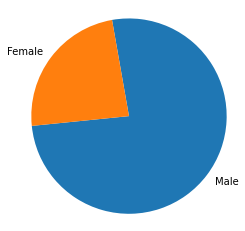

In [209]:
# Male, Female ratio 
sorted_counts = dfc['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, startangle = 100, counterclock = False);
plt.axis('square');


Male has a bigger ratio, to know why then we need more information as it could be due the higher proportion of male in this those city so in this case it will make since, another reason could be that the design style of bike does not attract female. 

Should we focus on subscriber or regular users in our customer retention program?

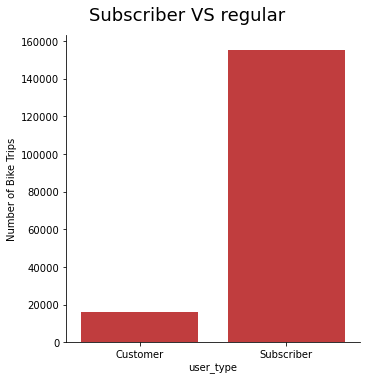

In [210]:
# Subscriber, regular  
color = sb.color_palette()[3]
s = sb.catplot(data = dfc, x = 'user_type', kind = 'count', color = color, aspect = 1);
s.set_axis_labels('user_type', 'Number of Bike Trips'),
s.fig.suptitle('Subscriber VS regular ', y = 1.05, fontsize = 18);

Seems riders are using bikes for something important (Work) rather than casual use.

What is the most time riders are using our bikes? (Weekdays)

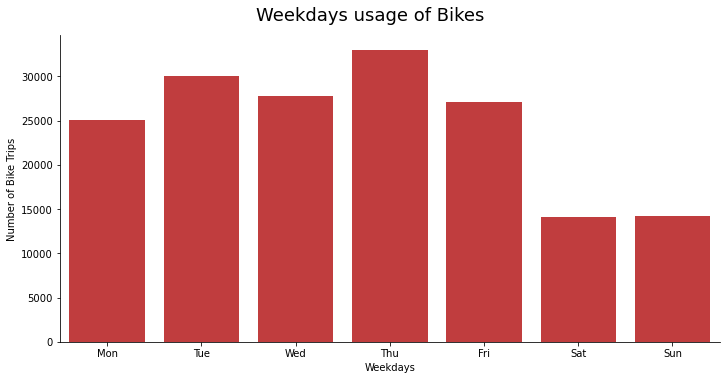

In [224]:
# Daily usage of Bikes 
color = sb.color_palette()[3]
order = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
weekdays = sb.catplot(data = dfc, x = 'start_time_weekday', kind = 'count', color = color, aspect = 2,order=order);
weekdays.set_axis_labels('Weekdays', 'Number of Bike Trips'),
weekdays.fig.suptitle('Weekdays usage of Bikes', y = 1.05, fontsize = 18);


The weekends days (Sat, Sun) have the lowest rides, Most likely the riders using bikes for work, however, we are not very sure that all riders on all year using bikes for work  as this data is only for one month (Feb) and it could be due to winter season. 

What is the most time riders are using our bikes? (Hourly)

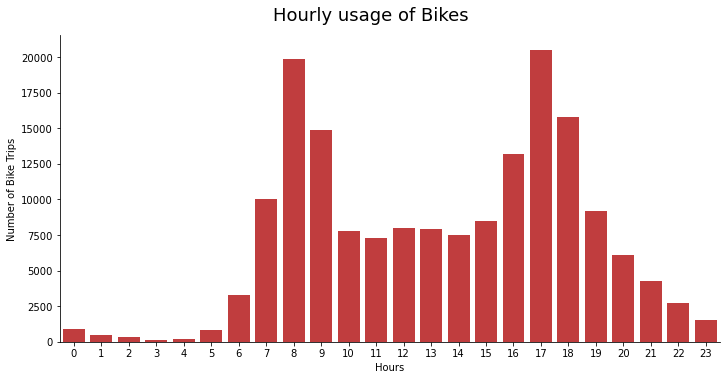

In [212]:
# Daily usage of Bikes 
color = sb.color_palette()[3]
Hours = sb.catplot(data = dfc, x = 'start_hour', kind = 'count', color = color, aspect = 2);
Hours.set_axis_labels('Hours', 'Number of Bike Trips'),
Hours.fig.suptitle('Hourly usage of Bikes', y = 1.05, fontsize = 18);

The peaks are from 8 AM to  9 AM and from 5 PM to  6 PM , which means that most riders are employee ,this will help to target employees people for our ads.

What is most age using our bikes?

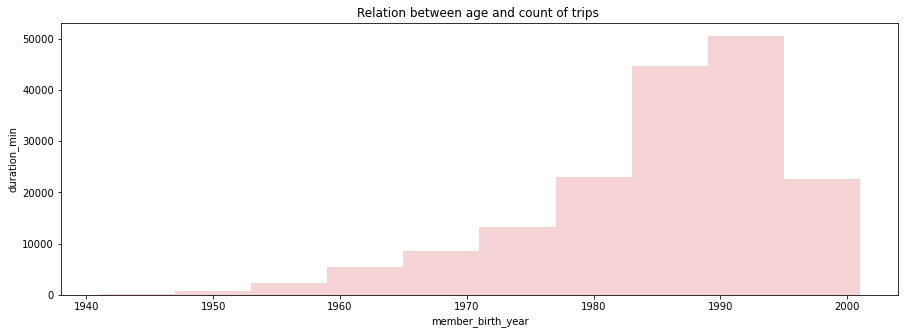

In [213]:
# Relation between age and count of trips
plt.figure(figsize = [15,5])
plt.hist(data = dfc, x = 'member_birth_year', alpha=1/5, color=color);
plt.title('Relation between age and count of trips ')
plt.xlabel('member_birth_year')
plt.ylabel('duration_min');


30 years are having most trip counts 

> Make sure that, after every plot or related series of plots, that you
include a Markdown cell with comments about what you observed, and what
you plan on investigating next.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No, all was fine 

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I just added columns for hours, weekday 

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

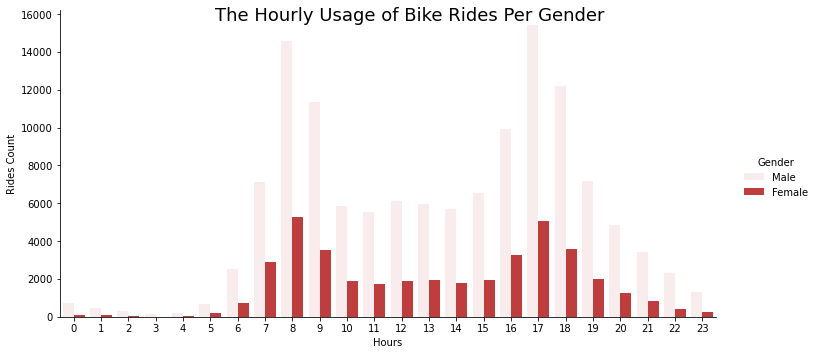

In [214]:
# The Hourly Usage of Bike Rides Per Gender
Bi = sb.catplot(data=dfc, x='start_hour', hue='member_gender', kind='count',aspect=2, color=color )
Bi.set_axis_labels('Hours', 'Rides Count')
Bi._legend.set_title('Gender')
Bi.fig.suptitle('The Hourly Usage of Bike Rides Per Gender', fontsize=18);

Fixed ratio between male and female

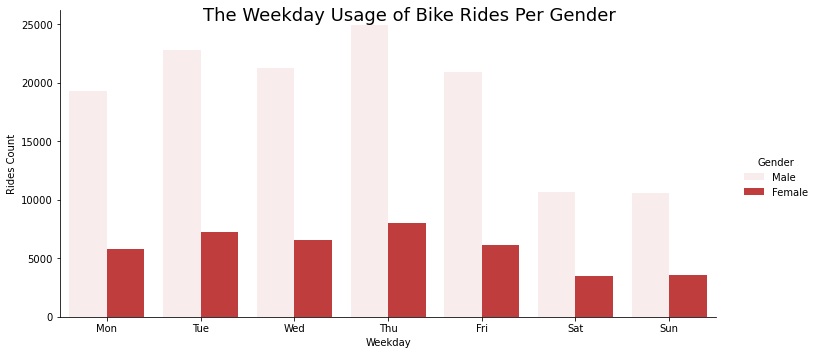

In [225]:
# The Weekday Usage of Bike Rides Per Gender
Bi = sb.catplot(data=dfc, x='start_time_weekday', hue='member_gender', kind='count',aspect=2, color=color,order=order )
Bi.set_axis_labels('Weekday', 'Rides Count')
Bi._legend.set_title('Gender')
Bi.fig.suptitle('The Weekday Usage of Bike Rides Per Gender', fontsize=18);

If we get the population and the male / female ratio in this city, we can estimate the male to female ratio in the labor force

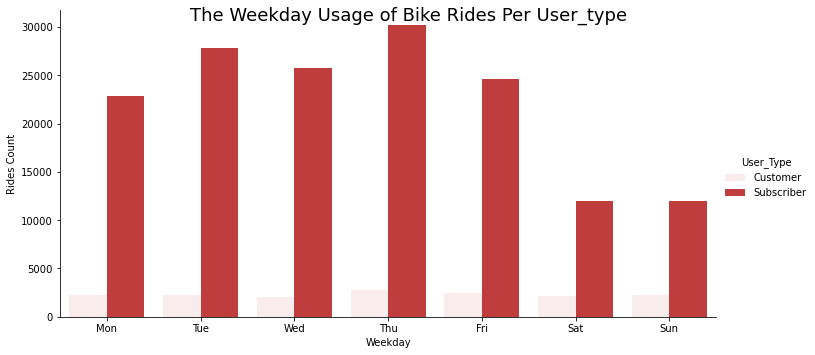

In [231]:
# The Weekday Usage of Bike Rides Per User_type
Bi = sb.catplot(data=dfc, x='start_time_weekday', hue='user_type', kind='count',aspect=2, color=color,order=order )
Bi.set_axis_labels('Weekday', 'Rides Count')
Bi._legend.set_title('User_Type')
Bi.fig.suptitle('The Weekday Usage of Bike Rides Per User_type', fontsize=18);

The regular customers have an almost fixed number of rides during the weekdays which make sense as that use it for casual trips and is not related to frequent trips (Ex: Work) 

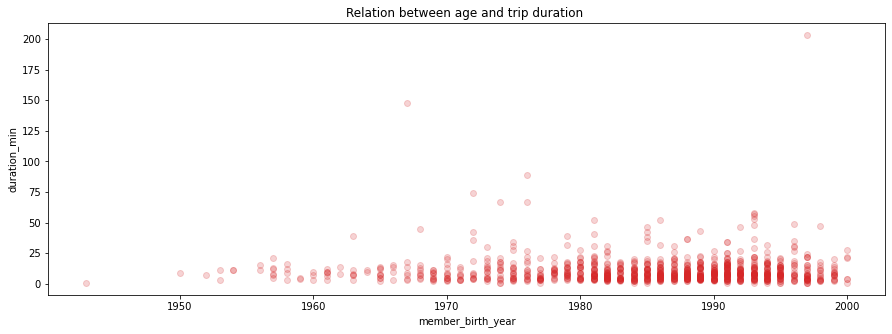

In [234]:
# Relation between age and trip duration 
plt.figure(figsize = [15,5])
# Smaple of dataset to reduce report.html size
plt.scatter(data = dfc.sample(1000), x = 'member_birth_year', y = 'duration_min', alpha=1/5, color=color);
plt.title('Relation between age and trip duration ')
plt.xlabel('member_birth_year')
plt.ylabel('duration_min');

More younger age much duration which make sense

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> The results become more clear now with Bivariate figures

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes , More younger age much duration which make sense

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

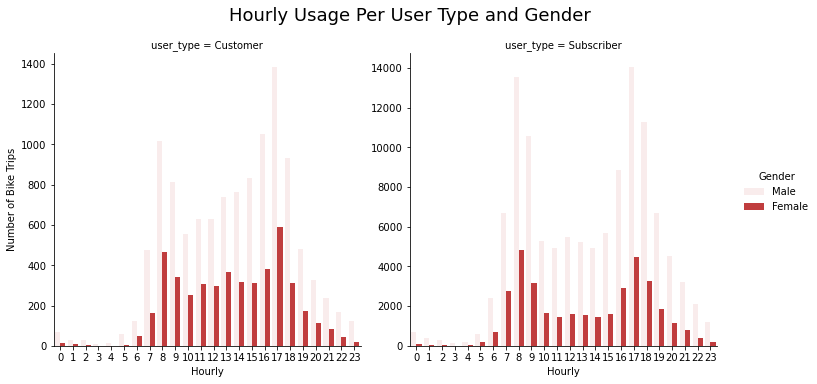

In [229]:
# Hourly usage - user type and gender
gr = sb.catplot(data=dfc, x='start_hour', col="user_type", hue="member_gender", kind='count', sharey = False, height=5, aspect=1, color = color);
gr.set_axis_labels("Hourly", "Number of Bike Trips")
gr._legend.set_title('Gender')
gr.fig.suptitle('Hourly Usage Per User Type and Gender', fontsize=18, y=1.06);


The pattern is somehow is similar which means that a number of regular users are using bikes also for their work, this is leading us to target those users by promotion to convert them to be subscriber users.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> Yes, you have a view of the big picture of insights 


### Were there any interesting or surprising interactions between features?

> Yes, the Same behavior for customer and subscriber 

> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!